<a href="https://colab.research.google.com/github/MehreenWaqar/Machine-Learning/blob/main/UAC_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn import utils
from keras.models import Sequential
from keras.layers import Dense

from datetime import datetime

In [4]:
start_time = datetime.now()
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['smart_grid_stability_augmented.csv']))
# data = pd.read_csv('https://www.kaggle.com/pcbreviglieri/smart-grid-stability')

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

Saving smart_grid_stability_augmented.csv to smart_grid_stability_augmented.csv


In [5]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
12543,2.755361,1.724739,5.681498,6.289436,2.619851,-0.624212,-1.194526,-0.801113,0.892151,0.381306,0.324954,0.135862,-0.035430,1
44545,5.299072,4.409123,1.594429,1.851446,3.259876,-1.031665,-0.879518,-1.348693,0.211783,0.517309,0.262834,0.139093,-0.030382,1
49979,7.512814,2.200809,8.045889,9.616251,2.377325,-0.985733,-0.703106,-0.688485,0.118933,0.967001,0.932764,0.280216,0.018994,0
19281,8.197261,7.640019,8.222058,6.218469,3.315650,-1.863729,-0.644657,-0.807264,0.130433,0.635686,0.942956,0.959476,0.083177,0
16105,7.867904,9.152494,0.744260,9.767656,5.398027,-1.680714,-1.822225,-1.895088,0.707599,0.977310,0.755166,0.884462,0.056038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,4.622528,6.311079,1.447743,7.376786,3.406129,-1.676161,-0.883491,-0.846477,0.706442,0.253795,0.555306,0.334536,-0.003830,1
22824,8.678593,0.528542,3.655324,1.512856,3.555289,-1.536692,-1.071873,-0.946724,0.433078,0.932403,0.271944,0.445925,-0.042117,1
32747,6.878462,9.900298,3.404691,8.509816,4.159822,-0.990680,-1.905540,-1.263602,0.624203,0.207251,0.411861,0.540370,0.031491,0
41076,1.966714,8.313682,3.249799,4.751619,3.303774,-0.924143,-0.684356,-1.695274,0.983044,0.426769,0.157574,0.528520,-0.021402,1


In [6]:
#Correlate UnitPrice
df = pd.DataFrame(data)
df['UnitPrice'] = float(50)
for x in range(60000):
  if df.stabf[x] == 0:
   df.UnitPrice[x] = df.stab[x]/100 * 32
  else: 
   df.UnitPrice[x] = df.stab[x]/100 * 16

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,UnitPrice
12543,2.755361,1.724739,5.681498,6.289436,2.619851,-0.624212,-1.194526,-0.801113,0.892151,0.381306,0.324954,0.135862,-0.035430,1,-0.005669
44545,5.299072,4.409123,1.594429,1.851446,3.259876,-1.031665,-0.879518,-1.348693,0.211783,0.517309,0.262834,0.139093,-0.030382,1,-0.004861
49979,7.512814,2.200809,8.045889,9.616251,2.377325,-0.985733,-0.703106,-0.688485,0.118933,0.967001,0.932764,0.280216,0.018994,0,0.006078
19281,8.197261,7.640019,8.222058,6.218469,3.315650,-1.863729,-0.644657,-0.807264,0.130433,0.635686,0.942956,0.959476,0.083177,0,0.026617
16105,7.867904,9.152494,0.744260,9.767656,5.398027,-1.680714,-1.822225,-1.895088,0.707599,0.977310,0.755166,0.884462,0.056038,0,0.017932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,4.622528,6.311079,1.447743,7.376786,3.406129,-1.676161,-0.883491,-0.846477,0.706442,0.253795,0.555306,0.334536,-0.003830,1,-0.000613
22824,8.678593,0.528542,3.655324,1.512856,3.555289,-1.536692,-1.071873,-0.946724,0.433078,0.932403,0.271944,0.445925,-0.042117,1,-0.006739
32747,6.878462,9.900298,3.404691,8.509816,4.159822,-0.990680,-1.905540,-1.263602,0.624203,0.207251,0.411861,0.540370,0.031491,0,0.010077
41076,1.966714,8.313682,3.249799,4.751619,3.303774,-0.924143,-0.684356,-1.695274,0.983044,0.426769,0.157574,0.528520,-0.021402,1,-0.003424


In [7]:
#Linear Regression Algo with 1 input(stab) and 1 output(unit price)
X = df.iloc[:,12:13].values
X
y = df.iloc[:,14:15].values
y

array([[-0.00566878],
       [-0.00486115],
       [ 0.00607821],
       ...,
       [ 0.01007713],
       [-0.00342435],
       [ 0.02744285]])

In [8]:
#splitting 80/20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

Accuracy =  98.00450386903412 %


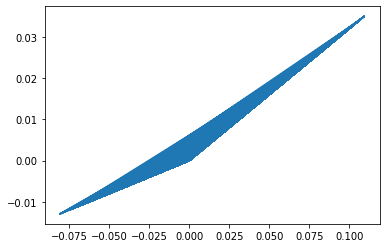

In [10]:
# Linear Regression algo

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
plt.plot(X_train, y_train)
accuracy = reg.score(X_test,y_test)
print("Accuracy = ",accuracy*100,'%')

Accuracy =  99.94866139721731 %


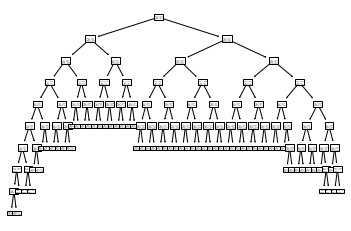

In [11]:
#Decision Tree Regression Algo

decisionTree = tree.DecisionTreeRegressor()
decisionTree = decisionTree.fit(X_train, y_train)
tree.plot_tree(decisionTree) 
accuracy = decisionTree.score(X_test,y_test)
print("Accuracy = ",accuracy*100,'%')

Accuracy =  97.98726976972092 %


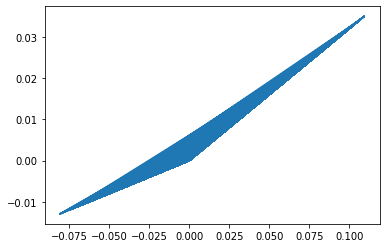

In [12]:
#Ridge Regression Algo
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
plt.plot(X_train, y_train)
accuracy = ridge.score(X_test,y_test)
print("Accuracy = ",accuracy*100,'%')

In [57]:
#SVM Regression Algo
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)
accuracy = regr.score(y_test,prediction)
print("Accuracy = ",accuracy*100,'%')


Accuracy =  100.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#Random Forest Regression Algo
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
# prediction = regr.predict(X_test)
accuracy = regr.score(X_test,y_test)
print("Accuracy = ",accuracy*100,'%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy =  92.58807468646744 %
